# Import libraries and load dataset

In [1]:
# load sample data set
import pandas as pd
import numpy as np
import seaborn as sns
df= sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Defining variables

In [2]:
x= df.iloc[:,:-1]
y= df.iloc[:, -1:]

## Prediction

In [3]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100)
model.fit(x, y)
model.predict([[3, 4, 1.4, 5]])

C:\Users\m s\AppData\Local\Temp\ipykernel_2932\772498032.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x, y)
c:\Users\m s\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

### What are n_estimators?
This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.
the number vof n_estimators can be increased or decreased.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/5)
predictions= model.predict(x_test)
predictions

array(['virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

## Accuracy test

In [5]:
score= model.score(x_test, y_test)
print("the accuracy score is", score)

the accuracy score is 1.0


In [6]:
# 2nd method
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, predictions))

Accuracy: 1.0


# Confusion metrics

In [7]:
from sklearn import metrics
cm= metrics.confusion_matrix(y_test, predictions)
cm

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  8]], dtype=int64)

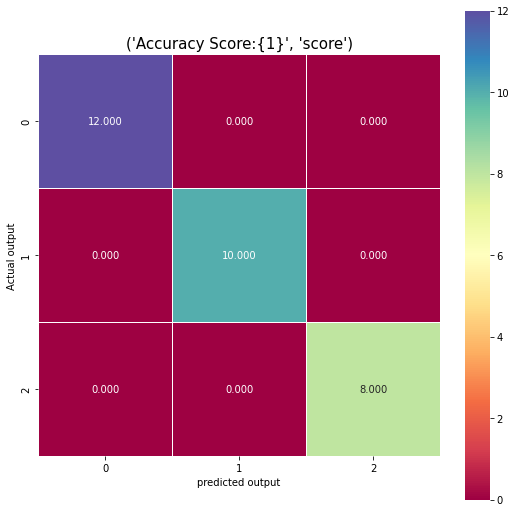

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot= True, fmt=".3f", linewidths= .5, square= True, cmap='Spectral');
plt.ylabel('Actual output')
plt.xlabel('predicted output')
all_sample_title= 'Accuracy Score:{1}', format('score')
plt.title(all_sample_title, size= 15);